In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.datasets import ImageFolder

In [2]:
torch.manual_seed(42)

In [3]:
train_dir = 'C:/Users/dell/Desktop/ricedata/train'
test_dir = 'C:/Users/dell/Desktop/ricedata/val'

In [4]:
img_width, img_height = 224, 224
batch_size = 32

In [5]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(img_width),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

In [6]:
transform_test = transforms.Compose([
    transforms.Resize((img_width, img_height)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

In [7]:
train_dataset = ImageFolder(train_dir, transform=transform_train)
test_dataset = ImageFolder(test_dir, transform=transform_test)

In [8]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


In [9]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))


e:\Anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_train_correct = 0
    total_train_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, train_predicted = torch.max(outputs.data, 1)
        total_train_samples += labels.size(0)
        total_train_correct += (train_predicted == labels).sum().item()

    train_accuracy = total_train_correct / total_train_samples

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total

    print(f'Epoch {epoch+1}/{num_epochs}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

print("Training complete.")


Epoch 1/10, Train Accuracy: 0.9288, Test Accuracy: 0.8617
Epoch 2/10, Train Accuracy: 0.9537, Test Accuracy: 0.9864
Epoch 3/10, Train Accuracy: 0.9643, Test Accuracy: 0.9873
Epoch 4/10, Train Accuracy: 0.9677, Test Accuracy: 0.9829
Epoch 5/10, Train Accuracy: 0.9701, Test Accuracy: 0.9951
Epoch 6/10, Train Accuracy: 0.9725, Test Accuracy: 0.9571
Epoch 7/10, Train Accuracy: 0.9743, Test Accuracy: 0.9821
Epoch 8/10, Train Accuracy: 0.9749, Test Accuracy: 0.9764
Epoch 9/10, Train Accuracy: 0.9761, Test Accuracy: 0.9948
Epoch 10/10, Train Accuracy: 0.9774, Test Accuracy: 0.9969
Training complete.


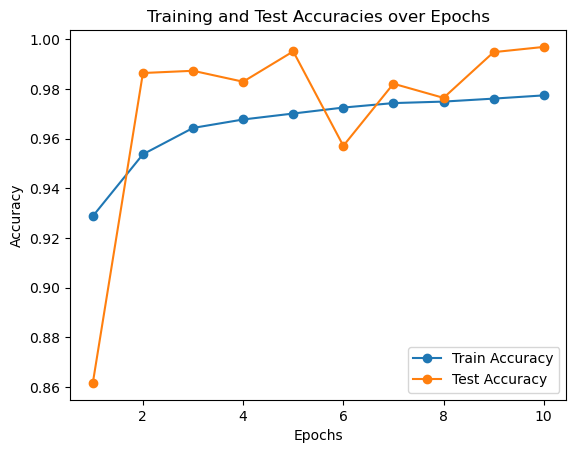

In [13]:
import matplotlib.pyplot as plt

epochs = list(range(1, 11))
train_accuracy = [0.9288, 0.9537, 0.9643, 0.9677, 0.9701, 0.9725, 0.9743, 0.9749, 0.9761, 0.9774]
test_accuracy = [0.8617, 0.9864, 0.9873, 0.9829, 0.9951, 0.9571, 0.9821, 0.9764, 0.9948, 0.9969]

plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracy, label='Test Accuracy', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies over Epochs')

plt.legend()

plt.show()


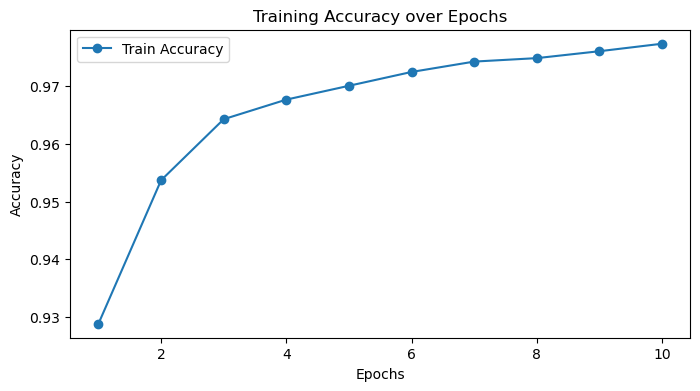

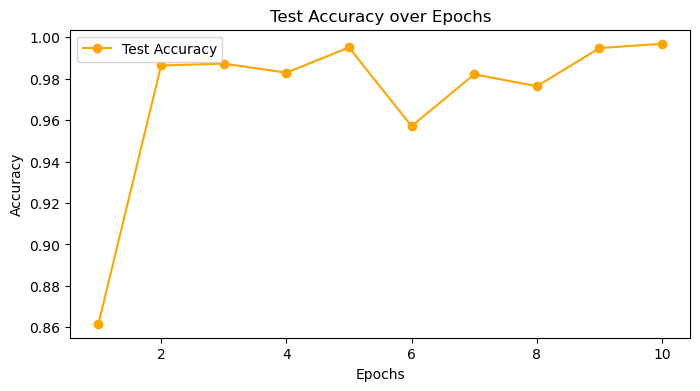

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(epochs, test_accuracy, label='Test Accuracy', marker='o', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.show()